# Exercise 5 – Numpy Basics
Here we get aquainted with Numpy.

In [1]:
# Code from Book: Build Your Own AI Investor
# Damon Lee 2021
# Check out the performance on www.valueinvestingai.com
# Code uses data from the (presumably) nice people at https://simfin.com/. 
# Feel free to fork this code for others to see what can be done with it.

In [24]:
# Set the plotting DPI settings to be a bit higher.
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8.0, 5.0]
plt.rcParams['figure.dpi'] = 150

# Exercise 5
Here we will do a discounted cash flow calculation with Numpy.

#### Unfortunately Toby has messed up our code! Try and fix it and get it working.

In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [3]:
#Here is the cash flow data for the company. Values in millions
cashFlow_years = [2013, 2014, 2015, 2016, 2017, 2018, 2019]
freeCashFlow = [12.02, 13.45, 10.2, 15.44, 14.9, 16.37, 17.18]
freeCashFlowData = np.array([cashFlow_years, freeCashFlow])

#array for growth as a percentage for years 2013->2018, to be populated with a for loop.
growth = np.zeros(6)

In [4]:
for i in range(1, len(growth)+1):#index counter is done for you
    growth[i-1] = (freeCashFlowData[1,i]/freeCashFlowData[1,i-1]-1) * 100

In [5]:
# Use a numpy function to calculate the average growth rate of the free cash flow of this company
avgGrowthRate = growth.mean()
print('The average growth rate was:', avgGrowthRate, '%')

The average growth rate was: 8.403709513779809 %


In [6]:
# Define a function that returns an array containing cash flow and discounted cash flow for each future year.
def calcDCF(discRate, growthRate, currentFcf, numYears, startYear):
    
    # Start zero arrays and fill the array with a loop.
    futureCashFlows = np.zeros(numYears)
    futureDiscCashFlows = np.zeros(numYears)
    
    # Now fill the array with a loop
    for i in range(0, numYears):
        futureCashFlows[i] = currentFcf * (growthRate+1) ** i
        futureDiscCashFlows[i] = futureCashFlows[i]/((1+discRate)**i)
    
    # Have an array for the future years, from say, 2020 to 2020 + numYears
    futureYears = np.array(range(startYear, startYear+numYears))
    
    # Return the arrays of: future cash flows
    # Future discounted Cash Flows
    # Future years that those cash flowws occur in
    return [futureCashFlows, futureDiscCashFlows, futureYears]

In [7]:
# Now use the calcDCF() function
# compute the projected future cash flows of the company and the discounted values of those cash flows.
# Use a discount rate of 20% to compensate us for vicissitudes of life.
# Have it start at year 2020, have it go for 9 years
[futureCashFlows, futureDiscCashFlows, futureYears] = calcDCF(0.2, 0.08, 17, 9, 2020)

print('The future cash flow years calculated are:\n', futureYears)
print('The future cash flows are:\n', futureCashFlows)
print('The discounted future cash flows are:\n', futureDiscCashFlows)

The future cash flow years calculated are:
 [2020 2021 2022 2023 2024 2025 2026 2027 2028]
The future cash flows are:
 [17.         18.36       19.8288     21.415104   23.12831232 24.97857731
 26.97686349 29.13501257 31.46581357]
The discounted future cash flows are:
 [17.         15.3        13.77       12.393      11.1537     10.03833
  9.034497    8.1310473   7.31794257]


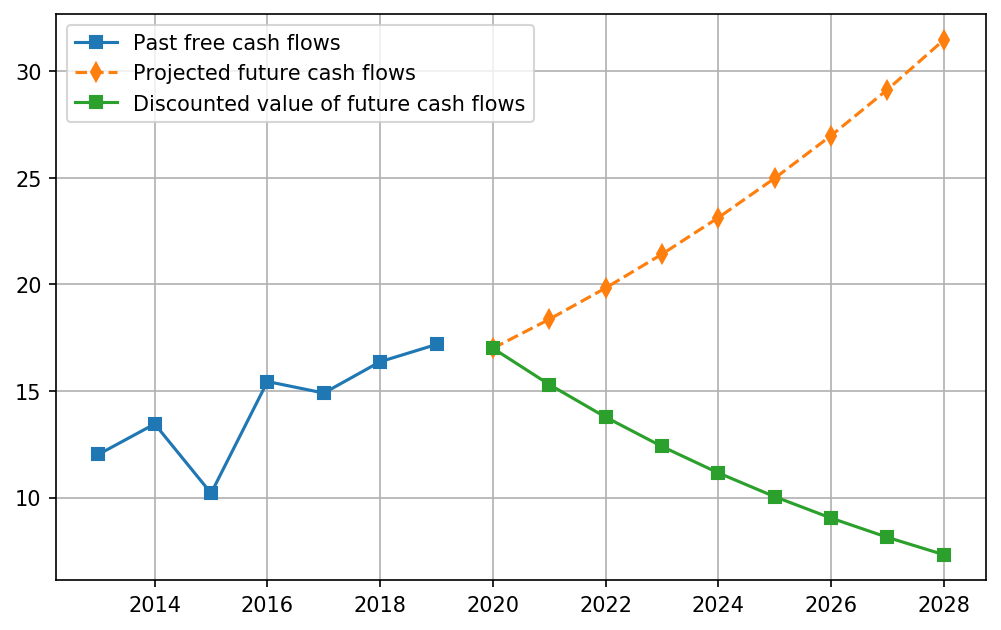

In [25]:
# plot the past cash flows, future cash flows, and discounted future cash flows on a graph.
plt.plot(freeCashFlowData[0,:], freeCashFlowData[1,:], '-s', label='Past free cash flows')
plt.plot(futureYears, futureCashFlows, '--d', label='Projected future cash flows')
plt.plot(futureYears, futureDiscCashFlows, '-s', label='Discounted value of future cash flows')
plt.legend()
plt.grid()

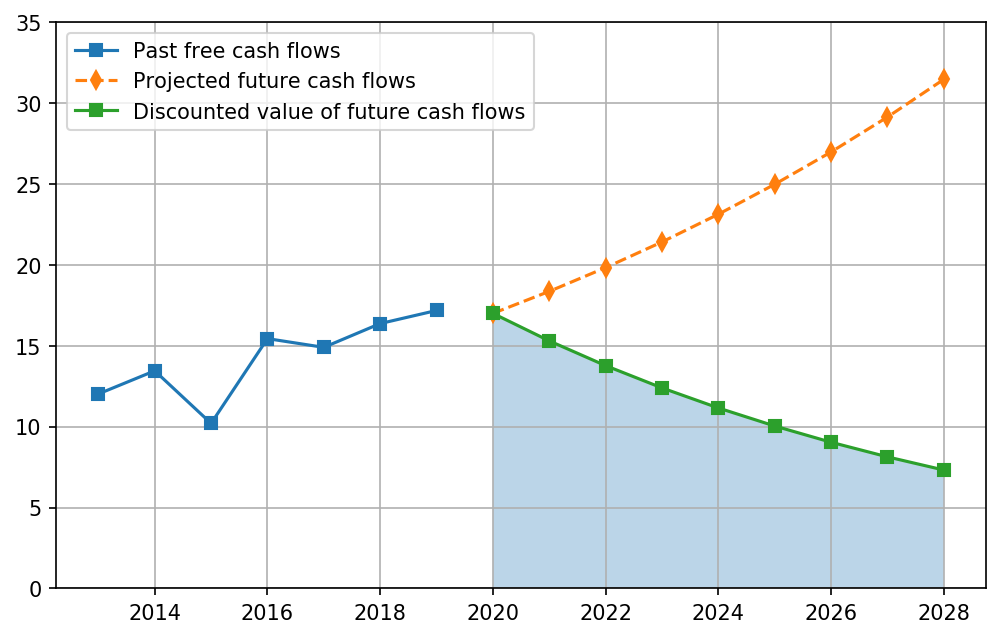

In [28]:
# plot the past cash flows, future cash flows, and discounted future cash flows on a graph.
plt.plot(freeCashFlowData[0,:], freeCashFlowData[1,:], '-s', label='Past free cash flows')
plt.plot(futureYears, futureCashFlows, '--d', label='Projected future cash flows')
plt.plot(futureYears, futureDiscCashFlows, '-s', label='Discounted value of future cash flows')
plt.fill_between(futureYears, futureDiscCashFlows, 0, alpha=0.3)
plt.ylim([0, 35])
plt.legend()
plt.grid()

We can see here graphically that the present value of the future cash flows is the area under the blue line that is sloping downwards in the future.

What a DCF is actually doing is weighting a value of future cash that comes to us (through the company), where the further into the future we project, the more uncertain we are, and so we discount that money heavily.

Cool, we can take a look at the market cap and see if the company is a bargain worth buying or not!
https://www.investopedia.com/terms/d/dcf.asp

In [9]:
# Print out the net present value of future cash flows.
print('The net future value of discounted projected cash flows(the company value right now) is:\n',
      round(futureDiscCashFlows.sum(),2),
      'million dollars')

The net future value of discounted projected cash flows(the company value right now) is:
 104.14 million dollars


Buy the companies stock is the market cap is below this number (assuming you calculated everything correct)

In [10]:
# Brief of what was done

# Take a stock and take a look at a numpy array of previous cash flows.
# With these cash flows as an array, compute an array with the growth values for each year with a loop.
# from this array of growth values, compute the mean, which we will use for future cash flows

# Define a function that returns an array containing cash flow and discounted cash flow for each future year.
# This function should take in the discount rate, the growth rate, the current free cash flow
# As each value of the discounted future cash flows is computed differently, use a loop to iterate over our array.

# plot the past cash flows, future cash flows, and discounted future cash flows on a graph.
# Print out the net present value of future cash flows.